<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/Test%20Solutions/MTA_P1_1S2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Máquinas Térmicas A - P1 - 1ºS 2024**

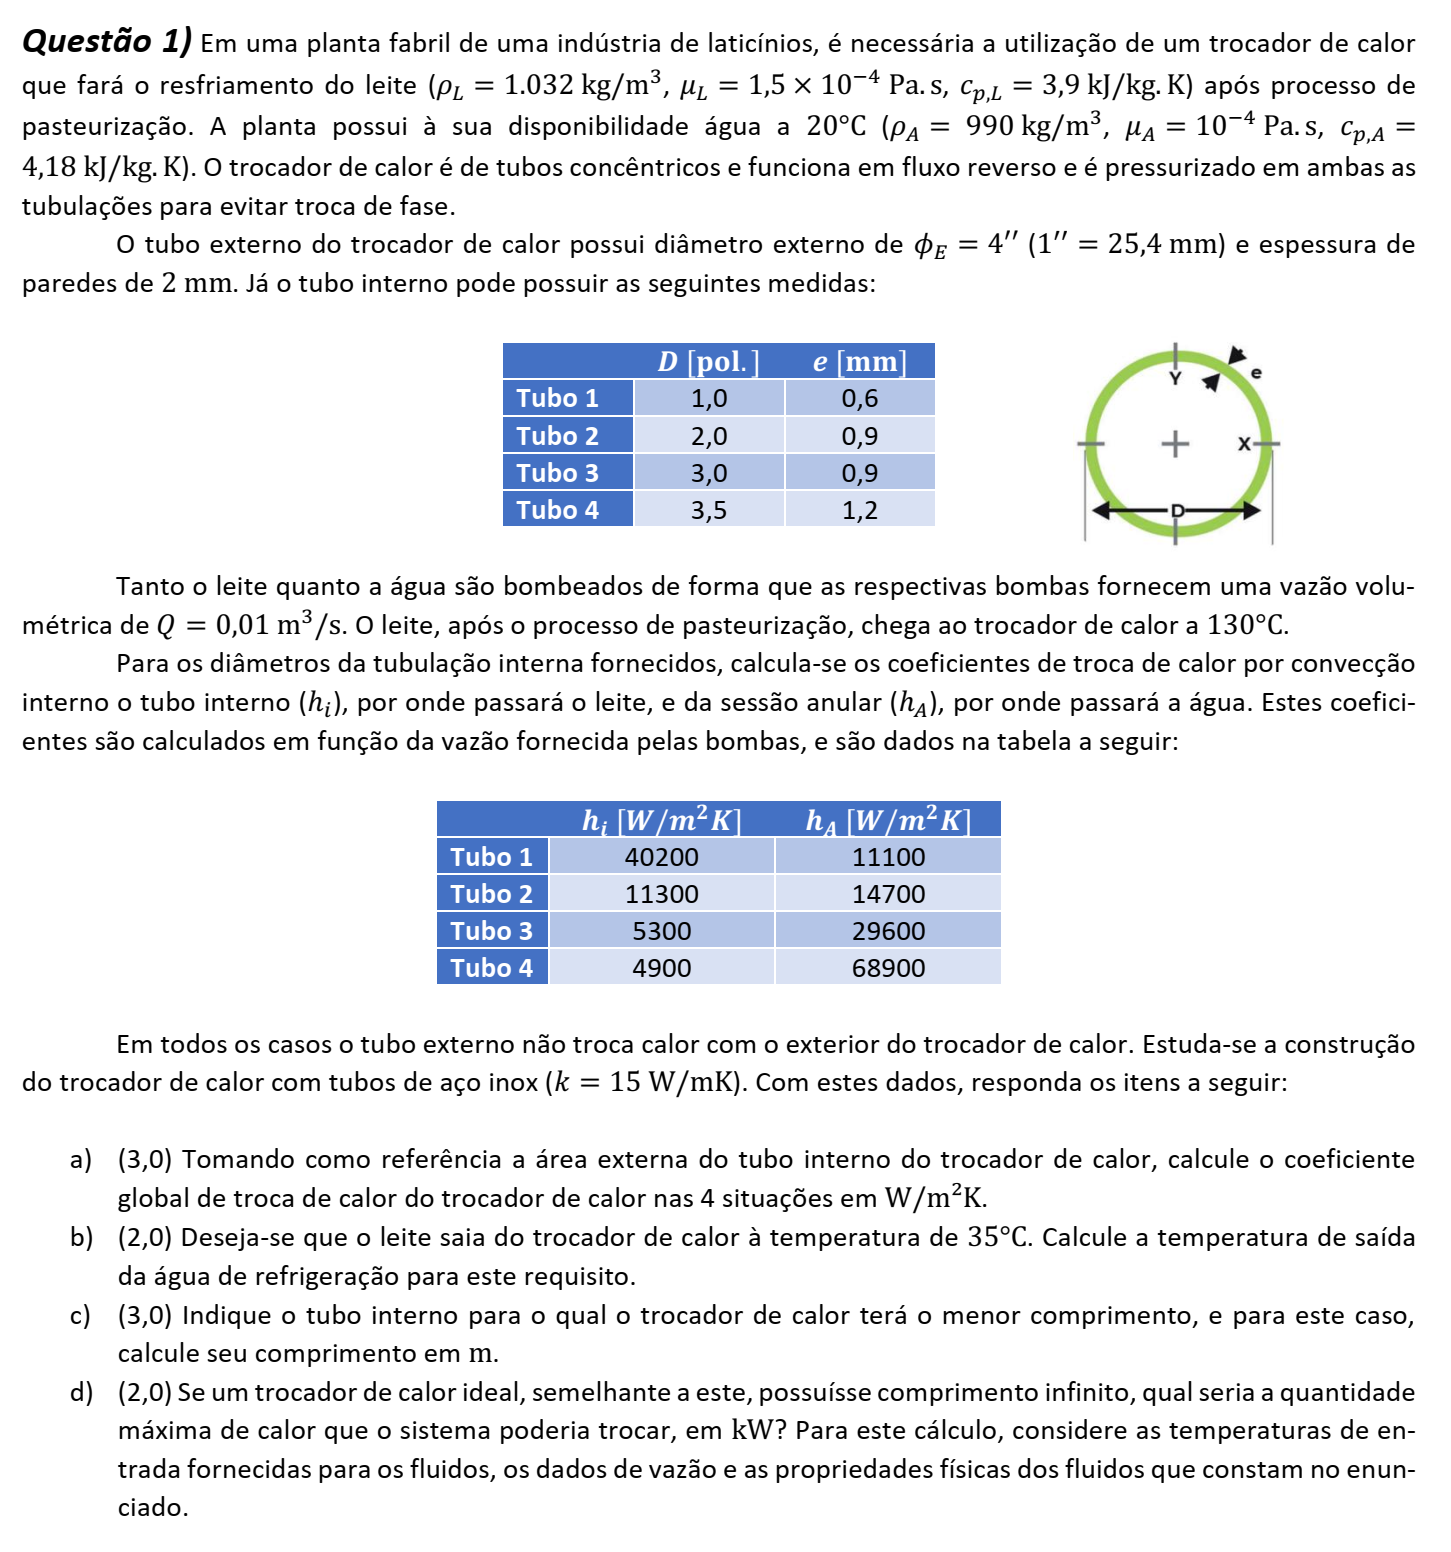

## Cálculos Preparatórios

Para resolver o problema, separamos os dados aqui, em alguns casos já convertendo as unidades para o sistema métrico. Além disso, a área da sessão transversal interna dos tubos ($A_i$) e os perímetros interno e externo da sessão transversal ($P_i$ e $P_o$) são calculados.

Os perímetros são calculados, pois para uma casca cilíndrica (que é a forma da área pela qual o calor é trocado neste exercício) a sua área é dada por:

$$
A_{cil} = 2\pi r L = PL
$$

Sendo $P = 2\pi L$ o perímetro da circunferência que gera o cilindro.

In [1]:
# Dados necessários:

rho_L = 1032 # kg/mˆ3
cp_L = 3900  # J/kg.K

rho_A = 990  # kg/mˆ3
cp_A = 4180  # J/kg.K

Q = 0.01  # mˆ3/s

k = 15    # W/mK

tubo1 = dict()

tubo1['D'] = 1*0.0254  # m
tubo1['e'] = 0.0006    # m
tubo1['hi'] = 40200    # W/mˆ2 K
tubo1['ho'] = 11100    # W/mˆ2 K

tubo2 = dict()

tubo2['D'] = 2*0.0254  # m
tubo2['e'] = 0.0009    # m
tubo2['hi'] = 11300    # W/mˆ2 K
tubo2['ho'] = 14700    # W/mˆ2 K

tubo3 = dict()

tubo3['D'] = 3*0.0254  # m
tubo3['e'] = 0.0009    # m
tubo3['hi'] = 5300     # W/mˆ2 K
tubo3['ho'] = 29600    # W/mˆ2 K

tubo4 = dict()

tubo4['D'] = 3.5*0.0254  # m
tubo4['e'] = 0.0012      # m
tubo4['hi'] = 4900       # W/mˆ2 K
tubo4['ho'] = 68900      # W/mˆ2 K

In [2]:
# Calculando as áreas transversais internas (Ai) e os perímetros interno (Pi)
# e externo (Po) de cada tubo:

from numpy import pi

tubo1['Ai'] = pi*((tubo1['D']-2*tubo1['e'])**2)/4
tubo1['Pi'] = pi*(tubo1['D']-2*tubo1['e'])
tubo1['Po'] = pi*(tubo1['D'])

tubo2['Ai'] = pi*((tubo2['D']-2*tubo2['e'])**2)/4
tubo2['Pi'] = pi*(tubo2['D']-2*tubo2['e'])
tubo2['Po'] = pi*(tubo2['D'])

tubo3['Ai'] = pi*((tubo3['D']-2*tubo3['e'])**2)/4
tubo3['Pi'] = pi*(tubo3['D']-2*tubo3['e'])
tubo3['Po'] = pi*(tubo3['D'])

tubo4['Ai'] = pi*((tubo4['D']-2*tubo4['e'])**2)/4
tubo4['Pi'] = pi*(tubo4['D']-2*tubo4['e'])
tubo4['Po'] = pi*(tubo4['D'])

## a)

Para calcular o coeficiente global de troca de calor, é necessário calcular a resistência térmica equivalente de uma fatia do trocador de calor de comprimento $L$. Assim, Temos:

$$
\frac{1}{UA_o} = \frac{1}{h_i A_i} + \frac{\ln{r_o/r_i}}{2\pi L k} + \frac{1}{h_o A_o}
$$

Sabendo que $A_i = P_iL$ e $A_o = P_oL$, podemos reescrever a equação como:

$$
\frac{1}{UP_oL} = \frac{1}{h_i P_iL} + \frac{\ln{r_o/r_i}}{2\pi L k} + \frac{1}{h_o P_oL}
$$

Podemos multiplicar ambos os lados pelo comprimento $L$ para obter:
$$
\frac{1}{UP_o} = \frac{1}{h_i P_i} + \frac{\ln{r_o/r_i}}{2\pi k} + \frac{1}{h_o P_o}
$$

Assim, calcula-se:

$$
U = \frac{1}{\displaystyle P_o \left(\frac{1}{h_i P_i} + \frac{\ln{r_o/r_i}}{2\pi k} + \frac{1}{h_o P_o} \right)}
$$

Repetindo este cálculo com os dados de cada tubo, se obtém os resultados a seguir:


In [3]:

from numpy import log

T = tubo1
T['U'] = (1/(1/(T['hi']*T['Pi']) + 1/(T['ho']*T['Po']) + log(T['Po']/T['Pi'])/(2*pi*k)))/T['Po']

T = tubo2
T['U'] = (1/(1/(T['hi']*T['Pi']) + 1/(T['ho']*T['Po']) + log(T['Po']/T['Pi'])/(2*pi*k)))/T['Po']

T = tubo3
T['U'] = (1/(1/(T['hi']*T['Pi']) + 1/(T['ho']*T['Po']) + log(T['Po']/T['Pi'])/(2*pi*k)))/T['Po']

T = tubo4
T['U'] = (1/(1/(T['hi']*T['Pi']) + 1/(T['ho']*T['Po']) + log(T['Po']/T['Pi'])/(2*pi*k)))/T['Po']

print('U1 = ', tubo1['U'], 'W/mˆ2 K')
print('U2 = ', tubo2['U'], 'W/mˆ2 K')
print('U3 = ', tubo3['U'], 'W/mˆ2 K')
print('U4 = ', tubo4['U'], 'W/mˆ2 K')

U1 =  6362.33692713842 W/mˆ2 K
U2 =  4527.7052630428025 W/mˆ2 K
U3 =  3475.2646174693864 W/mˆ2 K
U4 =  3274.8499315156773 W/mˆ2 K


## b)

Para resolver este item, pode-se primeiramente calcular a potência de calor que deve ser perdida pelo leite com:

$$
\dot{q} = \dot{m}_L c_{p,L} \left(T_{Q,e} - T_{Q,s}\right)
$$
, lembrando que $\dot{m} = \rho Q$

Com isto, basta aplicar o mesmo princípio para a água:

$$
T_{F,s} = \frac{\dot{q}}{\dot{m}_A c_{p,A}} + T_{F,e}
$$

In [4]:

TQe = 130  # ºC
TQs = 35   # ºC
TFe = 20   # ºC

dq = rho_L*Q*cp_L*(TQe-TQs)

print('dq = ', dq, 'W')

TFs = TFe + dq/(rho_A*Q*cp_A)

print('TFs = ', TFs, 'ºC')

dq =  3823560.0 W
TFs =  112.39669421487604 ºC


## c)

Neste caso, uma vez que as 4 temperaturas serão as mesmas em ambos os casos, podemos aplicar a equação:

$$
\dot{q} = UA \Delta T_{lm} = UPL \Delta T_{lm}
$$

Isolando $L$:

$$
L = \frac{\dot{q}}{UP\Delta T_{lm}}
$$

Como $\dot{q}$ e $\Delta T_{lm}$ serão os mesmos nos 4 casos, o maior produto $UP$ fornecerá o menor valor de $L$. Os resultados seguem abaixo.

In [5]:
print('U1.A1/L = ', tubo1['U']*tubo1['Po'])
print('U2.A2/L = ', tubo2['U']*tubo2['Po'])
print('U3.A3/L = ', tubo3['U']*tubo3['Po'])
print('U4.A4/L = ', tubo4['U']*tubo4['Po'])

# O menor comprimento será dado pelo maior produto UA/L, no caso o do tubo 4. Assim:

dTlm = ((TQs-TFe)-(TQe-TFs))/log((TQs-TFe)/(TQe-TFs))

Lmin = dq/(dTlm*tubo4['U']*tubo4['Po'])

print('L(min) = ', Lmin, 'm')

U1.A1/L =  507.6919221290124
U2.A2/L =  722.5896440733516
U3.A3/L =  831.9413733140043
U4.A4/L =  914.6249348461773
L(min) =  256.9915042152101 m


## d)

Em um trocador de tubos concêntricos em contrafluxo, na condição limite a temperatura de saída do leite será a temperatura de entrada da água. Assim:

$$
\dot{q}_\infty = \dot{m}_L c_{p,L}\left(T_{Q,e} - T_{F,e}\right)
$$

Os resultados seguem abaixo.

In [6]:
dq_inf = rho_L*Q*cp_L*(TQe-TFe)

print('dq_inf = ', dq_inf/1000, 'kW')

dq_inf =  4427.28 kW
